Monte Carlo - Shoreline Change Simulations

Step 1 <br>
Simulate meteorological record (storms and periods of calm) <br>
<enumerate>
<item> 1) Wave height
<item> 2) Wave period
<item> 3) SWEL condition
<item> 4) Time between storm events

In [2]:
import numpy as np
sea_level = 0.5

In [3]:
def wave_height():
    hs = np.random.random()
    return hs

def wave_period(hs):
    tps = np.random.random()
    return tps

def water_elevation(hs, tps):
    swel = np.random.random()
    return swel

def storm_duration(hs, swel):
    st_dur = np.random.random()
    return st_dur

def inter_storm_duration():
    int_st_dur = np.random.random()
    return int_st_dur


In [44]:
STORMNUMBER = 0
SUM_TIME = 0
MAX_TIME = 100
STORMS = {}
while SUM_TIME < MAX_TIME:
    # Define paramters
    hs = wave_height()
    tps = wave_period(hs)
    swel = water_elevation(hs, tps)
    st_dur = storm_duration(hs, swel)
    int_st_dur = inter_storm_duration()
    # Assign parameters to storm
    STORMS[STORMNUMBER] = {'HS':hs, 'TPS':tps, 'SWEL':swel, 'DURATION':st_dur, 'RECOVER':int_st_dur}
    # Increment total time
    increment = st_dur + int_st_dur
    SUM_TIME += increment
    STORMNUMBER += 1

In [33]:
len(STORMS)

95

Step 2 <br> 
Transform offshore wave conditions to onshore wave conditions (SWAN)<br>

Step 3<br>
Erode shoreline based on wave conditions at shoreline and duration of storm<br>


In [34]:
def Erosion(hs, tps, swel, duration, shoreline, sea_level):
    erosion = (hs+tps+swel)*duration*abs(sea_level) #"some function using hs, tps, swel, and duration"
    return erosion


Step 4<br>
Allow shoreline to accreate based on sea-level and period of calm<br>
based on equilibrium shoreline theory<br>

In [35]:
def Recovery(int_storm_dur, shoreline, sea_level):
    recovery = int_storm_dur*np.e**abs(sea_level)
    return recovery

Step 5<br>
Repeat steps 3 and 4 for entire climate record<br>

In [45]:
starting_position = 1
shoreline = [starting_position]
shoretime = [0]
i = 0
for storm in STORMS:
    # Erode the shoreline
    erosion = Erosion(STORMS[storm]['HS'],
                      STORMS[storm]['TPS'],
                      STORMS[storm]['SWEL'],
                      STORMS[storm]['DURATION'],
                      shoreline[i],
                      sea_level)
    eroded_shoreline = shoreline[i]-erosion
    shoreline.append(eroded_shoreline)
    shoretime.append(shoretime[i]+STORMS[storm]['DURATION'])
    i += 1
    # Allow shoreline to recover
    recovery = Recovery(STORMS[storm]['RECOVER'],
                        shoreline[i],
                        sea_level)
    recovered_shoreline = shoreline[i]+recovery
    shoreline.append(recovered_shoreline)
    shoretime.append(shoretime[i]+STORMS[storm]['RECOVER'])
    i += 1

Step 6<br>
Run 1000s of simulations for different sythetic climate records<br>


Step 7<br>
Evaluate storm ensamble to get final probability distributions<br>

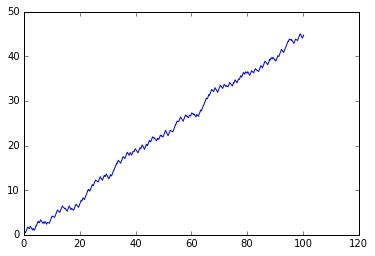

In [41]:
%matplotlib inline
from matplotlib.pyplot import plot
plot(shoretime, shoreline)

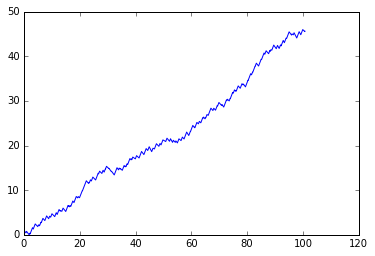

In [46]:
plot(shoretime, shoreline)